In [12]:
import pandas as pd
import pandas as pd
import numpy as np

#데이터 불러오기
df_2019 = pd.read_csv('./data/2019DATA_7장노년_KEY작업.csv', encoding='utf-8')
columns =pd.read_excel('./data/2019DATA_7고령층.xlsx',header=1)
df_2018 = pd.read_csv('./data/2018DATA_7장노년_KEY작업.csv',encoding='utf-8')
result = pd.read_csv('2018데이터_y값_열날림.csv',encoding = 'euc-kr')


In [75]:
df_2019.shape, df_2018.shape

((2300, 270), (2303, 233))

In [101]:
#y 값 정리 코드
df_2018 = df_2018.fillna(0)
        
lst = []
for i in range(189,210):
    for j in range(len(df_2018.iloc[:,i])):
        new_data = df_2018.iloc[j,:]
        if df_2018.iloc[j,i] != 0.0:
            new_data['y'] = df_2018.iloc[j,i]
            lst.append(new_data)
result = pd.DataFrame(lst)
result

<ipython-input-101-01748c1e2f3a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['y'] = df_2018.iloc[j,i]
C:\Users\wodud\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,ID,문1) 현재 귀하가 이용할 수 있는 데스크탑 컴퓨터나 노트북이 귀댁에 있습니까? 1) 데스크탑 컴퓨터,문1) 현재 귀하가 이용할 수 있는 데스크탑 컴퓨터나 노트북이 귀댁에 있습니까? 2) 노트북,문2) (보기 카드 제시) 다음 제시한 기기별로 귀댁에서 귀하가 이용할 수 있는 기기의 보유여부를 응답해주세요 1) 휴대폰(모두 응답) 1,문2) (보기 카드 제시) 다음 제시한 기기별로 귀댁에서 귀하가 이용할 수 있는 기기의 보유여부를 응답해주세요 1) 휴대폰(모두 응답) 2,문2) (보기 카드 제시) 다음 제시한 기기별로 귀댁에서 귀하가 이용할 수 있는 기기의 보유여부를 응답해주세요 1) 휴대폰(모두 응답)_보유여부,"문2) (보기 카드 제시) 다음 제시한 기기별로 귀댁에서 귀하가 이용할 수 있는 기기의 보유여부를 응답해주세요 2) 스마트패드(태블릿 PC: 아이패드, 갤럭시탭(노트), LG G패드, 넥서스7 등)","문2) (보기 카드 제시) 다음 제시한 기기별로 귀댁에서 귀하가 이용할 수 있는 기기의 보유여부를 응답해주세요 3) 스마트 주변기기(스마트워치, 스마트헬스밴드 등)","문3) 현재 귀댁에서는 컴퓨터/노트북, 스마트폰/스마트패드, TV, 게임기 등을 통해 인터넷(무선인터넷 포함)을 이용 할 수 있습니까?",문4) 귀하는 컴퓨터(데스크탑/노트북)를 통해 다음의 활동을 스스로 얼마나 하실 수 있으신지요? 1) 나는 필요한 프로그램(소프트웨어)을 컴퓨터에 설치/삭제/업데이트 할 수 있다,...,[일반/장노년]가구 구성 형태 2인 이상 다인 가구 5,[일반/장노년]가구 구성 형태 2인 이상 다인 가구 6,[일반/장노년]가구 구성 형태 2인 이상 다인 가구 7,[일반/장노년]가구 구성 형태 2인 이상 다인 가구 8,[일반/장노년]가구 월평균 소득,[일반/장노년]현재 거주지역 (광역시도),[일반/장노년]지역구분1,[일반/장노년]지역구분2,Weight,y
0,10180,2,2,2,0.0,1,2,2,1,1,...,0.0,0.0,0.0,0.0,9,1,1,1,1.89,22.0
1,10311,2,2,2,0.0,1,2,2,2,1,...,0.0,0.0,0.0,0.0,4,1,1,1,1.89,3.0
2,10312,1,2,2,0.0,1,2,2,1,3,...,0.0,0.0,0.0,0.0,9,1,1,1,1.89,7.0
3,10313,1,2,1,0.0,1,2,2,1,3,...,0.0,0.0,0.0,0.0,9,1,1,1,1.89,12.0
4,10314,2,2,3,0.0,2,2,2,1,1,...,0.0,0.0,0.0,0.0,2,1,1,1,1.89,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,11882,1,1,1,0.0,1,1,2,1,3,...,0.0,0.0,0.0,0.0,10,4,1,1,1.07,17.0
579,11890,1,2,1,0.0,1,2,2,1,4,...,0.0,0.0,0.0,0.0,11,4,1,1,1.07,17.0
598,11909,1,2,1,0.0,1,2,2,1,1,...,0.0,0.0,0.0,0.0,10,4,1,1,0.99,17.0
650,12084,1,1,1,0.0,1,1,2,1,3,...,0.0,0.0,0.0,0.0,7,4,1,1,0.92,17.0


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


22.0    1097
6.0      336
7.0      315
1.0      284
14.0     275
3.0      270
2.0      226
8.0      210
9.0      188
11.0     162
12.0     148
4.0      117
13.0     115
5.0      100
10.0      91
15.0      61
17.0      61
19.0      61
18.0      54
16.0      34
20.0      29
21.0       5
Name: y, dtype: int64


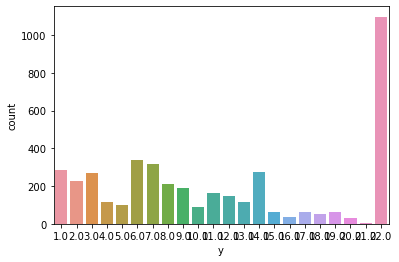

In [4]:
# y값 카운트
import seaborn as sns
sns.countplot(result['y'])
print(result['y'].value_counts())

In [5]:
result['y'].unique()

array([22.,  3.,  7., 12.,  4.,  8.,  1.,  9.,  2., 18.,  5., 19., 14.,
        6., 11., 16., 10., 15., 17., 13., 20., 21.])

In [43]:
print(
    '연령별직업 :',result['[일반/장노년]직업1'].unique(),'\n',
    '직업1 :',result['[일반/장노년]직업1'].unique(),'\n',
    '직업2 :',result['[일반/장노년]직업1'].unique(),'\n',
    '최종학력 : ',result['[일반/장노년]직업1'].unique(),'\n',
    '장애구분 1',result['[일반/장노년]직업1'].unique(),'\n',
    '장애구분 2',result['[일반/장노년]직업1'].unique(),'\n',
    '가구 거주 형태',result['[일반/장노년]직업1'].unique(),'\n',
    '가구거주 구성형태',result['[일반/장노년]직업1'].unique(),'\n',
    '가구 구성형태 2인이상 :',result['[일반/장노년]직업1'].unique(),result['[일반/장노년]직업1'].unique(),result['[일반/장노년]직업1'].unique(),result['[일반/장노년]직업1'].unique(),result['[일반/장노년]직업1'].unique(),result['[일반/장노년]직업1'].unique(),result['[일반/장노년]직업1'].unique(),result['[일반/장노년]직업1'].unique(),'\n',
    '가구 월평균 소득 :',result['[일반/장노년]직업1'].unique(),'\n',
    '현재 거주지역:',result['[일반/장노년]직업1'].unique(),'\n',
    '지역구분1:',result['[일반/장노년]직업1'].unique(),'\n',
    '지역구분2:',result['[일반/장노년]직업1'].unique()
)

연령별직업 : ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] 
 직업1 : ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] 
 직업2 : ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] 
 최종학력 :  ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] 
 장애구분 1 ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] 
 장애구분 2 ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] 
 가구 거주 형태 ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] 
 가구거주 구성형태 ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] 
 가구 구성형태 2인이상 : ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] 
 가구 월평균 소득 : ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] 
 현재 거주지역: ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] 
 지역구분1: ['5' '4' '3' '7' '1' '8' '9' '14' '11' 0 '6'] 

In [139]:
result = pd.read_csv('2018데이터_y값_열날림.csv',encoding = 'euc-kr')

# y값 5개의 값으로 묶기
y_feature = {
    '컴퓨터 기초': [1.,2.,3.,4.,5.],
    '생활서비스':[7.,8.,9.,10.],
    '소셜미디어':[12.,13.],
    '미디어 창작/앱 개발':[14.,15.,16.,17.],
    '새로운 기기 기술 체험 및 활용':[18.,19.,20.]
            }
def chage_y(x):
    for key, value in y_feature.items():
        for title in value:
            if x == title:
                return key
    return 0
result['y'] = result['y'].apply(lambda x: chage_y(x))

# *표시 제거
def not_star(x):
    if x == "*":
        x = 0
    return x
result = result.applymap(not_star)

#쓸모없는 열 행 날리기 

#행 날리기
result = result[result['y'] != 0]
result = result[result['[일반/장노년]성별'] != 0]

#열 삭제 
result = result.drop(result.columns[0:2], axis =1 )
result = result.drop(['Weight'],axis=1)

중복행 삭제
print(result['y'].value_counts())
result = result.drop_duplicates()
result['y'].value_counts()

In [148]:
result.head()

,문1) 현재 귀하가 이용할 수 있는 데스크탑 컴퓨터나 노트북이 귀댁에 있습니까? 1) 데스크탑 컴퓨터,문1) 현재 귀하가 이용할 수 있는 데스크탑 컴퓨터나 노트북이 귀댁에 있습니까? 2) 노트북,문2) (보기 카드 제시) 다음 제시한 기기별로 귀댁에서 귀하가 이용할 수 있는 기기의 보유여부를 응답해주세요 1) 휴대폰(모두 응답) 1,문2) (보기 카드 제시) 다음 제시한 기기별로 귀댁에서 귀하가 이용할 수 있는 기기의 보유여부를 응답해주세요 1) 휴대폰(모두 응답) 2,문2) (보기 카드 제시) 다음 제시한 기기별로 귀댁에서 귀하가 이용할 수 있는 기기의 보유여부를 응답해주세요 1) 휴대폰(모두 응답)_보유여부,"문2) (보기 카드 제시) 다음 제시한 기기별로 귀댁에서 귀하가 이용할 수 있는 기기의 보유여부를 응답해주세요 2) 스마트패드(태블릿 PC: 아이패드, 갤럭시탭(노트), LG G패드, 넥서스7 등)","문2) (보기 카드 제시) 다음 제시한 기기별로 귀댁에서 귀하가 이용할 수 있는 기기의 보유여부를 응답해주세요 3) 스마트 주변기기(스마트워치, 스마트헬스밴드 등)","문3) 현재 귀댁에서는 컴퓨터/노트북, 스마트폰/스마트패드, TV, 게임기 등을 통해 인터넷(무선인터넷 포함)을 이용 할 수 있습니까?",문4) 귀하는 컴퓨터(데스크탑/노트북)를 통해 다음의 활동을 스스로 얼마나 하실 수 있으신지요? 1) 나는 필요한 프로그램(소프트웨어)을 컴퓨터에 설치/삭제/업데이트 할 수 있다,문4) 귀하는 컴퓨터(데스크탑/노트북)를 통해 다음의 활동을 스스로 얼마나 하실 수 있으신지요? 2) 나는 컴퓨터에 유선 또는 무선 인터넷을 스스로 연결해서 사용할 수 있다,...,[일반/장노년]가구 구성 형태 2인 이상 다인 가구 4,[일반/장노년]가구 구성 형태 2인 이상 다인 가구 5,[일반/장노년]가구 구성 형태 2인 이상 다인 가구 6,[일반/장노년]가구 구성 형태 2인 이상 다인 가구 7,[일반/장노년]가구 구성 형태 2인 이상 다인 가구 8,[일반/장노년]가구 월평균 소득,[일반/장노년]현재 거주지역 (광역시도),[일반/장노년]지역구분1,[일반/장노년]지역구분2,y
1,2,2,2,0.0,1,2,2,2,1,1,...,0.0,0.0,0.0,0.0,0.0,4,0,1,1,컴퓨터 기초
2,1,2,2,0.0,1,2,2,1,3,2,...,0.0,0.0,0.0,0.0,0.0,9,0,1,1,생활서비스
3,1,2,1,0.0,1,2,2,1,3,3,...,0.0,0.0,0.0,0.0,0.0,9,0,1,1,소셜미디어
7,1,2,1,0.0,1,2,2,1,3,3,...,0.0,0.0,0.0,0.0,0.0,10,0,1,1,컴퓨터 기초
8,1,2,1,0.0,1,2,2,1,3,3,...,0.0,0.0,0.0,0.0,0.0,9,0,1,1,생활서비스


### 라벨링

In [364]:
import numpy as np
from sklearn import preprocessing
result = pd.read_csv('2018_data_preprocessing_48.csv')

lbl_data = pd.DataFrame()
lbl_data['컴퓨터_보유'] = result['문1) 현재 귀하가 이용할 수 있는 데스크탑 컴퓨터나 노트북이 귀댁에 있습니까? 1) 데스크탑 컴퓨터'].replace(2,0)
lbl_data['노트북_보유'] = result['문1) 현재 귀하가 이용할 수 있는 데스크탑 컴퓨터나 노트북이 귀댁에 있습니까? 2) 노트북'].replace(2,0)
lbl_data['기기보유'] = result['문2) (보기 카드 제시) 다음 제시한 기기별로 귀댁에서 귀하가 이용할 수 있는 기기의 보유여부를 응답해주세요 1) 휴대폰(모두 응답) 1'] #one hot
lbl_data['휴대폰_보유'] = result['문2) (보기 카드 제시) 다음 제시한 기기별로 귀댁에서 귀하가 이용할 수 있는 기기의 보유여부를 응답해주세요 1) 휴대폰(모두 응답)_보유여부'].replace(2,0)
lbl_data['테블릿_보유'] =result['문2) (보기 카드 제시) 다음 제시한 기기별로 귀댁에서 귀하가 이용할 수 있는 기기의 보유여부를 응답해주세요 2) 스마트패드(태블릿 PC: 아이패드, 갤럭시탭(노트), LG G패드, 넥서스7 등)'].replace(2,0)
lbl_data['스마트밴드_보유'] =result['문2) (보기 카드 제시) 다음 제시한 기기별로 귀댁에서 귀하가 이용할 수 있는 기기의 보유여부를 응답해주세요 3) 스마트 주변기기(스마트워치, 스마트헬스밴드 등)'].replace(2,0)
lbl_data['스마트기기_이용가능'] = result['문2) (보기 카드 제시) 다음 제시한 기기별로 귀댁에서 귀하가 이용할 수 있는 기기의 보유여부를 응답해주세요 3) 스마트 주변기기(스마트워치, 스마트헬스밴드 등)'].replace(2,0)
#전혀 그렇지 않다 ~ 매우그렇다 result.iloc[:,8:26]
lbl_data =  pd.concat([lbl_data,result.iloc[:,8:27]],axis=1)
#27 ~ 29 7-1 날짜별(0일 ~ 30일) min max scaler
lbl_data['인터넷사용날짜'] = result.iloc[:,27] / result.iloc[:,27].max()
lbl_data['스마트폰사용날짜'] = result.iloc[:,28] / result.iloc[:,28].max()
lbl_data['테블릿사용날짜'] = result.iloc[:,29] / result.iloc[:,29].max()


#30 ~ 81 전혀 없다 ~ 자주 있다 
lbl_data=pd.concat([lbl_data,result.iloc[:,30:82]],axis=1)

#사용하지 않는 이유 82 ~ 87 #무응답 제거 99 일단 안넣음
#지문 16번 5개 붂음 #써볼까 말까 고민 일단 안넣음

#95~ 161
lbl_data=pd.concat([lbl_data,result.iloc[:,95:162]],axis=1)
# 162 ~ 175 있다 없다 
change_2_0 = result.iloc[:,162:176].replace(2,0)
lbl_data = pd.concat([lbl_data,change_2_0],axis=1)

# 176 ~ 182
lbl_data = pd.concat([lbl_data,result.iloc[:,176:183]],axis=1)

# 183 ~ 187 #모름 9를 0으로 바꾸고 #전처리 따로해줘야한다 
# lbl_data['이용수준'] = result.iloc[:,183].replace(9,0)

#188 연령 범주형으로 묶을까 생각중 일단 놔두자
lbl_data['나이'] = result.iloc[:,189]

#성별 189 무응답 삭제할까 0으로 둘까 생각
lbl_data['성별'] =result.iloc[:,190]
#직업 1 Onehot
lbl_data['직업1'] = result.iloc[:,191]

#직업 2 있다 없다 Onehot
lbl_data['직업2'] = result.iloc[:,192]

# 학력 라벨
lbl_data['학력'] = result.iloc[:,193]

#장애 있다 없다
lbl_data['장애여부'] = result.iloc[:,194].replace([1,2],[0,1])
#장애구분 라벨
lbl_data['장애구분'] =result.iloc[:,195]
#가구주
lbl_data['가구주'] = result.iloc[:,196].replace(2,0)

#가구 거주 원핫
lbl_data['가구거주'] = result.iloc[:,197]

#가구 구성형태 197 (1인 2인)
lbl_data['가구구성형태'] = result.iloc[:,198].replace([1,2],[0,1])
#가구 구성형태 2인 이상 ~

# 월평균 소득 label
lbl_data['월평균소득'] = result['[일반/장노년]가구 월평균 소득']

#거주지역 one hot

#시,군
lbl_data['시군'] = result['[일반/장노년]지역구분1'].replace([1,2],[0,1])
#동,읍면
lbl_data['동읍면'] = result['[일반/장노년]지역구분2'].replace([1,2],[0,1])

#weight는 머지?
one_hot_columns = ['직업1','직업2','가구거주','기기보유']


lbl_data['y'] = result['y']



In [365]:
result.iloc[:,198]

0       2
1       2
2       2
3       2
4       2
       ..
2461    2
2462    2
2463    2
2464    2
2465    2
Name: [일반/장노년]가구 구성 형태, Length: 2466, dtype: int64

In [366]:
lbl_data['장애구분'].unique()

array([0., 1., 5., 6., 4., 3.])

In [367]:
lbl_data.to_csv('2018_preprocessing.csv')

In [304]:
# #중복행 삭제
# print(lbl_data['y'].value_counts())
# lbl_data = lbl_data.drop_duplicates()
# lbl_data['y'].value_counts()

컴퓨터 기초               949
생활서비스                763
미디어 창작/앱 개발          377
소셜미디어                250
새로운 기기 기술 체험 및 활용    127
Name: y, dtype: int64


컴퓨터 기초               654
생활서비스                497
미디어 창작/앱 개발          292
소셜미디어                218
새로운 기기 기술 체험 및 활용     94
Name: y, dtype: int64

In [368]:
lbl_data=pd.get_dummies(lbl_data, columns =one_hot_columns )

#### XGBoost 전처리

In [ ]:
# 데이터 타입 변경 일단 3개 #라벨 인코딩
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
lbl =LabelEncoder()

result['[일반/장노년]성별'] = lbl.fit_transform(result['[일반/장노년]성별'].astype(str))
result['[일반/장노년]직업1'] = lbl.fit_transform(result['[일반/장노년]직업1'].astype(str))
result['[일반/장노년]현재 거주지역 (광역시도)'] = lbl.fit_transform(result['[일반/장노년]현재 거주지역 (광역시도)'].astype(str))
result[['[일반/장노년]성별', '[일반/장노년]직업1', '[일반/장노년]현재 거주지역 (광역시도)']].dtypes

import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
result.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in result.columns.values]

### 데이터셋 

In [369]:
# 모델 분리
feature_columns = lbl_data.columns.difference(["y"]) # new_y를 제외한 모든 행
X = lbl_data[feature_columns]
y = lbl_data['y']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify = y)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1507, 210) (377, 210) (1507,) (377,)


In [380]:
#랜덤 포레스트 모델
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(n_estimators = 500 ,max_depth = 10, random_state = 42 ) # 시드값 고정
model1 = forest.fit(X_train, y_train) # 학습 진행

predict_train = model1.predict(X_train) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_train, predict_train) * 100), "%")

predict_test = model1.predict(X_test) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_test, predict_test) * 100), "%")



Accuracy: 70.84 %
Accuracy: 45.34 %


[('나이', 0.016733664146654344),
 ('월평균소득', 0.01204969523979902),
 ('스마트폰사용날짜', 0.011591681476416045),
 ('문22) (중학생 이상, 모든 응답자 대상) 귀하는 대체로 자신의 삶에 어느 정도 만족하시나요? 5) 내 삶을 다시 산다면, 나는 거의 아무것도 바꾸지 않을 것이다',
  0.010285799685175531),
 ('문20) (인터넷 이용자(문7의 ①응답자) 대상) 디지털기기(PC 또는 스마트폰 등) 이용 실제 성과에 관한 질문입니다.아래의 항목들에 대해 귀하께서는 어디에 해당되는지 응답해 주십시오. 3) 더 많？F1.2',
  0.009978179629617638),
 ('문4) 귀하는 컴퓨터(데스크탑/노트북)를 통해 다음의 활동을 스스로 얼마나 하실 수 있으신지요? 5) 나는 컴퓨터에 있는 파일을 인터넷을 통해 다른 사람에게 전송할 수 있다',
  0.009605979826182278),
 ('문22) (중학생 이상, 모든 응답자 대상) 귀하는 대체로 자신의 삶에 어느 정도 만족하시나요? 2) 내 삶의 조건들은 매우 우수하다',
  0.00951456372548729),
 ('문10) (생활 서비스) 귀하께서는 최근 1년 동안 다음과 같은 서비스를 얼마나 이용하셨습니까? 모든 항목에 대해 응답해 주십시오. 모바일기기 기준 3) 금융거래(인터넷뱅킹, 계좌 확인/이체/송금,F1.2',
  0.009400070449384052),
 ('문10) (생활 서비스) 귀하께서는 최근 1년 동안 다음과 같은 서비스를 얼마나 이용하셨습니까? 모든 항목에 대해 응답해 주십시오. 모바일기기 기준 1) 교통정보 및 지도',
  0.008829708048773763),
 ('문23-2)  다음의 나열한 지능정보기술들에 대하여 아는 정도와 실제 사용 또는 경험해 본적이 있는지, 아래의 기술들이 내 삶에 얼마나 필요하다고 생각하시는가요? ③ 필요도 5) 스마트홈',
  0.00850623756547

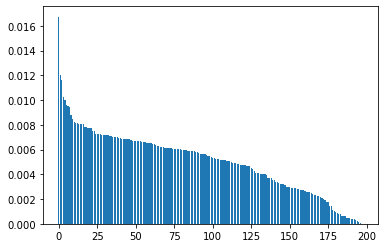

In [381]:
# 학습한 모델의 피쳐 중요도 그래프로 살펴봅니다
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices])

#학습한 모델의 피쳐 중요도 출력합니다
feat_labels =X.columns.tolist()
feature = list(zip(feat_labels, forest.feature_importances_))
#forest.feature_importances_로 순서를 맞춰 보여줘라
sorted(feature, key = lambda tup: tup[1], reverse = True)[:10]

In [382]:
#XGboost
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(random_state = 0, n_estimator = 150, max_depth = 7, subsample = 0.8,gamma = 0.1).fit(X_train, y_train)

predict_train = xgb.predict(X_train) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_train, predict_train) * 100), "%")

predict_test = xgb.predict(X_test) # 평가 데이터 예측
print("Accuracy: %.2f" % (accuracy_score(y_test, predict_test) * 100), "%")


C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:40:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:40:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 72.82 %
Accuracy: 41.70 %


In [383]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(xgb, random_state =1).fit(X_test,y_test)
eli5.show_weights(perm,feature_names = X_test.columns.tolist())

Weight,Feature
0.0121 ± 0.0120,문12) (네트워킹 정도) 최근 1년간 디지털기기(PC 또는 스마트폰 등)를 통해 다음과 같은 활동을 얼마나 하셨는지요? 모바일기기 기준 2) 나는 새로운 사람들을 알게 되고 소통하기 위해 인터넷을 ？F1.2
0.0085 ± 0.0113,문17) (모든 응답자 대상) 귀하께서는 아래 의견에 얼마나 동의하십니까? 20) 온/오프라인 교류는 항상 새로운 사람들과 만날 수 있게 한다
0.0069 ± 0.0071,"문23-2) 다음의 나열한 지능정보기술들에 대하여 아는 정도와 실제 사용 또는 경험해 본적이 있는지, 아래의 기술들이 내 삶에 얼마나 필요하다고 생각하시는가요? ② 사용 경험 7) 생체인증"
0.0069 ± 0.0061,문6) 귀하는 컴퓨터(데스크탑/노트북)와 모바일기기(스마트폰 및 스마트패드 등)를 통해 다음의 활동을 스스로 얼마나 하실 수 있습니까? 1) 나는 인터넷을 통해 타인과 연결하고 소통할 수 있으？F1.2
0.0065 ± 0.0086,"문19) (인터넷 이용자(문7의 ①응답자) 대상) 다음의 귀하의 새로운 기술을 접할 때 자신감, 태도 등에 관한 항목들입니다. 귀하께서는 어디에 해당되는지 응답해 주십시오. 8) 나는 어디에서든지 F1.2"
0.0061 ± 0.0026,"문7-1) (보기 카드 제시) 그럼, 귀하는 최근 한 달간 아래의 기기를 통해 인터넷을 며칠이나 이용하셨는지요? 3) 스마트패드(태블릿PC)"
0.0057 ± 0.0047,"문21) (중학생 이상, 모든 응답자 대상) 다음은 일상생활 부문별 만족도에 대한 질문입니다. 스마트폰 이용여부와 관계없이 귀하께서는 일상생활에서 아래의 항목들에 대해 얼마나 만족하십니까F1.2_6"
0.0057 ± 0.0040,문14) (경제활동 정도) 최근 1년간 디지털기기(PC 또는 스마트폰 등)를 통해 다음과 같은 활동을 얼마나 하셨는지요? 모바일기기 기준 3) 나는 인터넷을 통해 소득증대(유지)에 도움이 되는 관련 정F1.2
0.0057 ± 0.0040,문9) (사회관계 및 정보공유 서비스) 귀하께서는 최근 1년 동안 다음과 같은 서비스를 얼마나 이용하셨습니까? 모든 항목에 대해 응답해 주십시오. 모바일기기 기준 5) 클라우드 서비스
0.0057 ± 0.0040,문12) (네트워킹 정도) 최근 1년간 디지털기기(PC 또는 스마트폰 등)를 통해 다음과 같은 활동을 얼마나 하셨는지요? PC 기준 1) 나는 기존에 알던 사람들과 관계를 유지하고 더 친밀해지기 위해서 ？F1.2


In [361]:
lbl_data

,컴퓨터_보유,노트북_보유,기기보유,휴대폰_보유,테블릿_보유,스마트밴드_보유,스마트기기_이용가능,"문3) 현재 귀댁에서는 컴퓨터/노트북, 스마트폰/스마트패드, TV, 게임기 등을 통해 인터넷(무선인터넷 포함)을 이용 할 수 있습니까?",문4) 귀하는 컴퓨터(데스크탑/노트북)를 통해 다음의 활동을 스스로 얼마나 하실 수 있으신지요? 1) 나는 필요한 프로그램(소프트웨어)을 컴퓨터에 설치/삭제/업데이트 할 수 있다,문4) 귀하는 컴퓨터(데스크탑/노트북)를 통해 다음의 활동을 스스로 얼마나 하실 수 있으신지요? 2) 나는 컴퓨터에 유선 또는 무선 인터넷을 스스로 연결해서 사용할 수 있다,...,직업1_9,직업1_11,직업1_14,직업2_0.0,직업2_1.0,직업2_2.0,가구거주_1,가구거주_2,가구거주_3,가구거주_4
0,0,0,2,1,0,0,0,2,1,1,...,0,0,0,0,1,0,1,0,0,0
1,1,0,2,1,0,0,0,1,3,2,...,0,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,0,0,1,3,3,...,0,0,0,0,1,0,0,1,0,0
3,1,0,1,1,0,0,0,1,3,3,...,0,0,0,1,0,0,0,1,0,0
4,1,0,1,1,0,0,0,1,3,3,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,1,1,1,1,1,0,0,1,3,4,...,0,0,0,1,0,0,0,1,0,0
2462,1,0,1,1,0,0,0,1,4,4,...,0,0,0,0,1,0,1,0,0,0
2463,1,0,1,1,0,0,0,1,1,1,...,0,0,0,0,1,0,0,0,1,0
2464,1,1,1,1,1,0,0,1,3,3,...,0,0,0,0,0,1,0,1,0,0


array([2, 1, 3], dtype=int64)